<h1><u>Zoopla properties [SALES]: description evaluation</u></h1>

<h2>- Upload data</h2>

<b><i>#01 Import modules and libraries</i></b>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<b><i>#02 Import the dataset</i></b>

In [65]:
dataset = pd.read_csv('TrainingSet_WD_20180628.csv')
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].values
#y_train = dataset.iloc[:, 14].values

In [66]:
dataset.head(4)

,Unnamed: 0,ID,AREA,ADDRESS,BEDROOMS,BATHROOMS,RECEPTION,SIZE,FIRST LISTED,ORIGINAL PRICE,CURRENT PRICE,WEB,FLOORPLAN LINK,New,NUMBER OF CLOSEST STATIONS,MIN. DISTANCE TO THE STATION
0,0,48155752,NaN,"Union Park, Packet Boat Lane, Cowley UB8",0.0,1.0,1.0,0.0,7th Jun 2018,260000,260000,https://www.zoopla.co.uk/for-sale/details/4815...,NaN,New,2,0.8
1,1,48153665,NaN,"Moorfield Road, Cowley, Middlesex UB8",4.0,0.0,0.0,0.0,7th Jun 2018,610000,610000,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.7
2,2,48150822,West Drayton,"Hawthorne Crescent, West Drayton, Middlesex UB7",1.0,0.0,0.0,0.0,7th Jun 2018,249950,249950,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.4
3,3,48149509,West Drayton,"1 South Road, West Drayton UB7",3.0,1.0,1.0,0.0,7th Jun 2018,450000,450000,https://www.zoopla.co.uk/for-sale/details/4814...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.8


In [67]:
X[0]

array([48155752, nan, 'Union Park, Packet Boat Lane, Cowley UB8', 0.0,
       1.0, 1.0, 0.0, '7th Jun 2018', '260000', '260000',
       'https://www.zoopla.co.uk/for-sale/details/48155752', nan, 'New',
       2, 0.8], dtype=object)

In [68]:
X[0][8]

'260000'

In [69]:
print("The raw data-set has {} records.".format(len(dataset)))

The raw data-set has 211 records.


<h2>- Scan descriptions</h2>

<b># Upload Bag of Words (BOW)</b>

In [70]:
bow = pd.read_csv('bag_of_words.csv', header=None)
print(bow)

                  0     1
0     new refurbish  0.90
1       new develop  0.80
2          crossrai  0.40
3     superly place  0.40
4         new built  0.70
5         new build  0.70
6   convienent flat  0.20
7     larger family  0.25
8       family bath  0.15
9      luxury apart  0.30
10     walking dist  0.70


<b># Calculate weights for training set description</b>

In [71]:
bow.insert(2, 'Counter', 0)

In [72]:
bow

,0,1,Counter
0,new refurbish,0.90,0
1,new develop,0.80,0
2,crossrai,0.40,0
3,superly place,0.40,0
4,new built,0.70,0
5,new build,0.70,0
6,convienent flat,0.20,0
7,larger family,0.25,0
8,family bath,0.15,0
9,luxury apart,0.30,0


<b># Add <code>Description</code> column to <code>dataset</code>.</b>

In [73]:
dataset.insert(dataset.columns.get_loc('CURRENT PRICE')+1, 'Description', '')

In [74]:
dataset.head(3)

,Unnamed: 0,ID,AREA,ADDRESS,BEDROOMS,BATHROOMS,RECEPTION,SIZE,FIRST LISTED,ORIGINAL PRICE,CURRENT PRICE,Description,WEB,FLOORPLAN LINK,New,NUMBER OF CLOSEST STATIONS,MIN. DISTANCE TO THE STATION
0,0,48155752,NaN,"Union Park, Packet Boat Lane, Cowley UB8",0.0,1.0,1.0,0.0,7th Jun 2018,260000,260000,,https://www.zoopla.co.uk/for-sale/details/4815...,NaN,New,2,0.8
1,1,48153665,NaN,"Moorfield Road, Cowley, Middlesex UB8",4.0,0.0,0.0,0.0,7th Jun 2018,610000,610000,,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.7
2,2,48150822,West Drayton,"Hawthorne Crescent, West Drayton, Middlesex UB7",1.0,0.0,0.0,0.0,7th Jun 2018,249950,249950,,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.4


In [75]:
index_of_description = dataset.columns.get_loc('Description')
print('The index of column <Description> is {}.'.format(index_of_description))

The index of column <Description> is 11.


In [76]:
X[9][10]

'https://www.zoopla.co.uk/for-sale/details/48117769'

In [79]:
import requests, re, os
import pandas as pd
from bs4 import BeautifulSoup

evaluations =  []
descriptions = []

for this_property in range(0, len(dataset), 1):
    #print(X[this_property][6])
    web = X[this_property][10]
    # print(web, ':')
    r = requests.get(web)
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    
    evaluation = 0.0
    
    try:
        description = soup.find("div", {"class":"top"}).text.replace("\n", "")
        dataset.iat[this_property, index_of_description] = description
        
        descriptions.append(description)
        
        description = description.upper().replace(' ', '')
        
        for word in range(0, len(bow), 1):
            if bow.iat[word, 0].upper().replace(' ', '') in description:
                evaluation = evaluation + float(bow.iat[word, 1])
                print('-- keyword found: {}'.format(bow.iat[word, 0]))
                
                bow.iat[word, bow.columns.get_loc('Counter')] = bow.iat[word, bow.columns.get_loc('Counter')] + 1
            
        evaluations.append(evaluation)
    
        #if evaluation != 0:
        #    print(web)
    except:
        try:          
            description = soup.find('div', {'class':'dp-description__text'}).text.replace('\n', '')
            dataset.iat[this_property, index_of_description] = description
            
            descriptions.append(description)
            
            description = description.upper().replace(' ', '')

            for word in range(0, len(bow), 1):
                if bow.iat[word, 0].upper().replace(' ', '') in description:
                    evaluation = evaluation + float(bow.iat[word, 1])
                    print('-- keyword found: {}'.format(bow.iat[word, 0]))

                    bow.iat[word, bow.columns.get_loc('Counter')] = bow.iat[word, bow.columns.get_loc('Counter')] + 1  
            
            evaluations.append(evaluation)
            
            #if evaluation != 0:
            #    print(web)           
        except:
            print('Description not found.')
        
        

-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: family bath
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walking dist
-- keyword found: crossrai
-- keyword found: luxury apart
-- keyword found: crossrai
-- keyword found: family bath
-- keyword found: walkin

<b>#Convert descriptions to <code>Numpy array</code> for variable <code>descriptions_np</code>.</b>

In [80]:
descriptions_np = np.asarray(descriptions)

<b># Convert evaluations to <code>Numpy array</code> for variable <code>evaluations_np</code>.</b>

In [81]:
evaluations_np = np.asarray(evaluations)

In [82]:
evaluations_np

array([0.  , 1.25, 0.4 , 0.15, 0.  , 0.4 , 0.  , 0.15, 0.15, 0.4 , 0.55,
       0.4 , 0.  , 1.1 , 0.4 , 0.  , 0.4 , 0.15, 0.7 , 1.25, 0.4 , 0.4 ,
       0.4 , 1.25, 0.  , 1.25, 0.  , 0.  , 0.7 , 1.25, 0.  , 0.  , 1.1 ,
       0.  , 0.  , 0.4 , 0.  , 0.4 , 0.4 , 0.4 , 0.4 , 0.15, 0.15, 0.4 ,
       0.4 , 1.1 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.  , 0.7 , 1.25, 0.  ,
       0.55, 1.4 , 0.4 , 0.55, 1.1 , 0.  , 0.7 , 1.1 , 1.1 , 0.4 , 0.55,
       1.25, 0.15, 0.85, 0.55, 0.15, 1.25, 0.  , 0.4 , 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.55, 1.1 , 0.4 , 0.4 , 1.1 , 1.1 , 0.  , 0.  , 0.  ,
       0.  , 0.55, 0.55, 0.55, 1.25, 0.55, 0.4 , 0.  , 0.  , 0.  , 1.25,
       0.55, 0.4 , 1.1 , 0.55, 0.  , 0.4 , 1.1 , 0.55, 0.55, 1.1 , 0.15,
       0.15, 0.  , 0.15, 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.15, 0.55,
       0.  , 0.4 , 0.4 , 0.3 , 0.  , 0.  , 0.4 , 0.4 , 0.55, 0.4 , 0.  ,
       0.  , 0.  , 0.  , 0.4 , 0.4 , 0.55, 0.55, 0.  , 0.  , 0.  , 0.55,
       0.55, 0.7 , 0.15, 0.55, 0.4 , 0.  , 0.  , 0.

In [83]:
print('The size of dataset is {}, as it is for evaluations array: {} and descriptions {} also.'.format(len(dataset), len(evaluations_np), len(descriptions_np)))

The size of dataset is 211, as it is for evaluations array: 211 and descriptions 211 also.


In [84]:
print('The size of one single row in train test is {} features.'.format(len(X[0])))

The size of one single row in train test is 15 features.


In [85]:
print(X[0], evaluations_np[0], "\n", (type(X[0]), type(X[0][0]), type(evaluations_np[0])))

[48155752 nan 'Union Park, Packet Boat Lane, Cowley UB8' 0.0 1.0 1.0 0.0
 '7th Jun 2018' '260000' '260000'
 'https://www.zoopla.co.uk/for-sale/details/48155752' nan 'New' 2 0.8] 0.0 
 (<class 'numpy.ndarray'>, <class 'int'>, <class 'numpy.float64'>)


In [86]:
my_value = X[0]
print(my_value[0], type(my_value))

48155752 <class 'numpy.ndarray'>


In [87]:
merged_array = my_value.tolist()
merged_array.append(evaluations_np[0])

In [88]:
print(merged_array)

[48155752, nan, 'Union Park, Packet Boat Lane, Cowley UB8', 0.0, 1.0, 1.0, 0.0, '7th Jun 2018', '260000', '260000', 'https://www.zoopla.co.uk/for-sale/details/48155752', nan, 'New', 2, 0.8, 0.0]


<b># Merge data</b>

<p>First of all merge <code>features</code> values, <code>evaluation</code> and <code>descriptions</code>.</p>

In [89]:
merged_db = []

for element in range(0, len(X), 1):
    this_value = X[element].tolist()
    this_value.append(evaluations_np[element])
    this_value.append(descriptions_np[element])
    
    merged_db.append(this_value)

In [90]:
merged_db[0]

[48155752,
 nan,
 'Union Park, Packet Boat Lane, Cowley UB8',
 0.0,
 1.0,
 1.0,
 0.0,
 '7th Jun 2018',
 '260000',
 '260000',
 'https://www.zoopla.co.uk/for-sale/details/48155752',
 nan,
 'New',
 2,
 0.8,
 0.0,
 "Latest Uxbridge  property for sale                Zoopla is one of the UK's leading property portals, helping you to find property for sale and to rent and make smarter decisions when buying and renting homes in the UK. Discover information on homes in Uxbridge by researching Uxbridge property values, Uxbridge house prices paid, our Uxbridge property market overview and find Uxbridge agents.            "]

<b># Building-up a dataframe</b>

In [91]:
labels = ['ID', 'Area', 'Address', 'Bedrooms', 'Bathrooms', 'Reception', 'Size', 'First Listed', 'Original price', 'Current price',
          'URL', 'FLOORPLAN LINK', 'New', 'Number of the closest stations', 'Min. dist. to station', 'Evaluation','Description']

In [92]:
df = pd.DataFrame.from_records(merged_db, columns = labels)

In [93]:
df.head(3)

,ID,Area,Address,Bedrooms,Bathrooms,Reception,Size,First Listed,Original price,Current price,URL,FLOORPLAN LINK,New,Number of the closest stations,Min. dist. to station,Evaluation,Description
0,48155752,NaN,"Union Park, Packet Boat Lane, Cowley UB8",0.0,1.0,1.0,0.0,7th Jun 2018,260000,260000,https://www.zoopla.co.uk/for-sale/details/4815...,NaN,New,2,0.8,0.00,Latest Uxbridge property for sale ...
1,48153665,NaN,"Moorfield Road, Cowley, Middlesex UB8",4.0,0.0,0.0,0.0,7th Jun 2018,610000,610000,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.7,1.25,A generous Four Bedroo...
2,48150822,West Drayton,"Hawthorne Crescent, West Drayton, Middlesex UB7",1.0,0.0,0.0,0.0,7th Jun 2018,249950,249950,https://www.zoopla.co.uk/for-sale/details/4815...,https://c.zoocdn.com/dynimgs/listings/resized/...,New,2,0.4,0.40,A first floor one bedr...


In [94]:
df.columns

Index(['ID', 'Area', 'Address', 'Bedrooms', 'Bathrooms', 'Reception', 'Size',
       'First Listed', 'Original price', 'Current price', 'URL',
       'FLOORPLAN LINK', 'New', 'Number of the closest stations',
       'Min. dist. to station', 'Evaluation', 'Description'],
      dtype='object')

<b># Plot the evaluation distribution</b>

In [95]:
import matplotlib.pyplot as plt

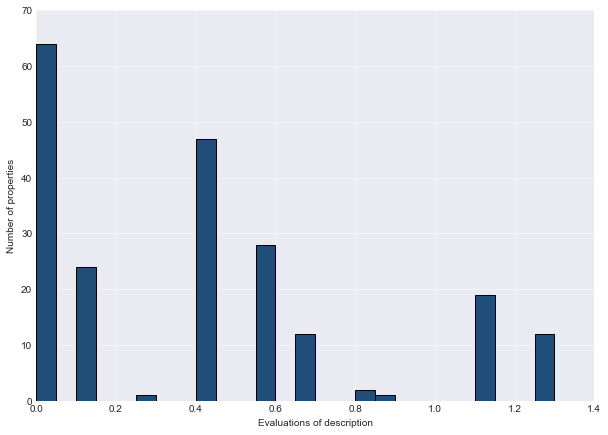

In [96]:
bins = np.arange(0, max(df['Evaluation']), 0.05)

_ = plt.hist(df['Evaluation'], bins = bins, color = '#1f4e79')

plt.xlabel('Evaluations of description')
plt.ylabel('Number of properties')

plt.show()

In [97]:
max(df['Evaluation'])

1.4

<b># Save data to the file</b>

In [98]:
df = df.sort_values('Evaluation', ascending = False)
print(df.head(4))

          ID          Area                                     Address  \
56  47766507  West Drayton         Kiln Lodge, Yiewsley, Middlesex UB7   
29  47950352  West Drayton             Stainby Close, West Drayton UB7   
53  47800341  West Drayton   Bentinck Road, Yiewsley, West Drayton UB7   
71  47678712  West Drayton  Colham Avenue, West Drayton, Middlesex UB7   

    Bedrooms  Bathrooms  Reception  Size  First Listed Original price  \
56       2.0        2.0        1.0   0.0  5th May 2018         329950   
29       4.0        2.0        3.0   0.0  1th Jun 2018         600000   
53       1.0        1.0        1.0   0.0  0th May 2018         350000   
71       3.0        1.0        2.0   0.0  8th May 2018         375000   

   Current price                                                URL  \
56        329950  https://www.zoopla.co.uk/for-sale/details/4776...   
29        600000  https://www.zoopla.co.uk/for-sale/details/4795...   
53        350000  https://www.zoopla.co.uk/for-sal

<b># Training set</b>

In [99]:
training_set = df[['ID', 'Bedrooms', 'Bathrooms', 'Reception', 'Size', 'Current price', 'URL', 'FLOORPLAN LINK',
                  'Min. dist. to station', 'Evaluation', 'Description']]

In [100]:
training_set.head(4)

,ID,Bedrooms,Bathrooms,Reception,Size,Current price,URL,FLOORPLAN LINK,Min. dist. to station,Evaluation,Description
56,47766507,2.0,2.0,1.0,0.0,329950,https://www.zoopla.co.uk/for-sale/details/4776...,https://c.zoocdn.com/dynimgs/listings/resized/...,0.4,1.40,A second floor luxury ...
29,47950352,4.0,2.0,3.0,0.0,600000,https://www.zoopla.co.uk/for-sale/details/4795...,https://c.zoocdn.com/dynimgs/listings/resized/...,0.7,1.25,Planning permission gr...
53,47800341,1.0,1.0,1.0,0.0,350000,https://www.zoopla.co.uk/for-sale/details/4780...,NaN,0.1,1.25,Welcoming to the marke...
71,47678712,3.0,1.0,2.0,0.0,375000,https://www.zoopla.co.uk/for-sale/details/4767...,https://c.zoocdn.com/dynimgs/listings/resized/...,0.2,1.25,No chain this three be...


In [101]:
training_set.to_csv('20180628_Comps_dataset_WD_1st.csv')

<b># Plot frequency distribution of keywords</b>

In [102]:
bow = bow.sort_values('Counter', ascending = False)

[Text(0,0,'0'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80'),
 Text(0,0,'100'),
 Text(0,0,'120')]

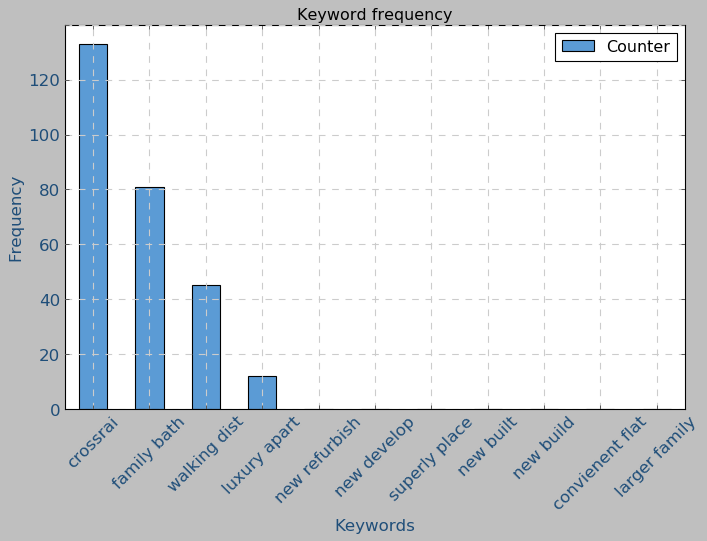

In [103]:
plt.style.use('_classic_test')

my_color = '#5b9bd5'
text_color = '#1f4e79'

ax = bow[['Counter']].plot(kind='bar', title ="Keyword frequency",figsize=(10,6),legend=True, fontsize=18, color = my_color)

ax.grid(color = '#cccccc', linestyle = '--', linewidth = 1)

ax.set_xlabel("Keywords",fontsize=15, color = text_color)
ax.set_ylabel("Frequency",fontsize=15, color = text_color)

y_labels = np.arange(0, np.max(bow[['Counter']]), 20)
ax.set_xticklabels(bow[0], rotation=45, fontsize = 15, color = text_color)
ax.set_yticklabels(y_labels, fontsize = 15, color = text_color)

<b># Set the <code>index</code> for each property based on URL</b>
<p>This Index will be the same as it is on Zoopla.</p>

In [104]:
df.insert(5, 'Price per bedroom', 0)
print(df.head(10))

           ID          Area                                      Address  \
56   47766507  West Drayton          Kiln Lodge, Yiewsley, Middlesex UB7   
29   47950352  West Drayton              Stainby Close, West Drayton UB7   
53   47800341  West Drayton    Bentinck Road, Yiewsley, West Drayton UB7   
71   47678712  West Drayton   Colham Avenue, West Drayton, Middlesex UB7   
202  45117263  West Drayton                 Money Lane, West Drayton UB7   
92   47522946  West Drayton             Philpots Close, West Drayton UB7   
23   47997725  West Drayton  Cherry Orchard, West Drayton, Middlesex UB7   
19   48035175  West Drayton            Evergreen Drive, West Drayton UB7   
98   47451151           NaN    St Clement Close, Uxbridge, Middlesex UB8   
1    48153665           NaN        Moorfield Road, Cowley, Middlesex UB8   

     Bedrooms  Bathrooms  Price per bedroom  Reception    Size  First Listed  \
56        2.0        2.0                  0        1.0     0.0  5th May 2018   
29 

In [105]:
index_of_ppb = df.columns.get_loc('Price per bedroom')
index_of_bed = df.columns.get_loc('Bedrooms')
index_of_price = df.columns.get_loc('Current price')
print('The column index for <Price per bedroom> is {}.'.format(index_of_ppb))
print('The column index for <Bedrooms> is {}.'.format(index_of_bed))
print('The column index for <Price> is {}.'.format(index_of_price))

The column index for <Price per bedroom> is 5.
The column index for <Bedrooms> is 3.
The column index for <Price> is 10.


<b># Calculate the price per bedroom</b>

In [106]:
for this_property in range(0, len(df), 1):
    if df.iat[this_property, index_of_bed] != 0:
        try:
            df.iat[this_property, index_of_ppb] = float(df.iat[this_property, index_of_price]) / float(df.iat[this_property, index_of_bed])
        except:
            df.iat[this_property, index_of_ppb] = 0.0
    else:
        df.iat[this_property, index_of_ppb] = 0.0

In [107]:
df.head()

,ID,Area,Address,Bedrooms,Bathrooms,Price per bedroom,Reception,Size,First Listed,Original price,Current price,URL,FLOORPLAN LINK,New,Number of the closest stations,Min. dist. to station,Evaluation,Description
56,47766507,West Drayton,"Kiln Lodge, Yiewsley, Middlesex UB7",2.0,2.0,164975,1.0,0.0,5th May 2018,329950,329950,https://www.zoopla.co.uk/for-sale/details/4776...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.4,1.40,A second floor luxury ...
29,47950352,West Drayton,"Stainby Close, West Drayton UB7",4.0,2.0,150000,3.0,0.0,1th Jun 2018,600000,600000,https://www.zoopla.co.uk/for-sale/details/4795...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.7,1.25,Planning permission gr...
53,47800341,West Drayton,"Bentinck Road, Yiewsley, West Drayton UB7",1.0,1.0,350000,1.0,0.0,0th May 2018,350000,350000,https://www.zoopla.co.uk/for-sale/details/4780...,NaN,NaN,2,0.1,1.25,Welcoming to the marke...
71,47678712,West Drayton,"Colham Avenue, West Drayton, Middlesex UB7",3.0,1.0,125000,2.0,0.0,8th May 2018,375000,375000,https://www.zoopla.co.uk/for-sale/details/4767...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.2,1.25,No chain this three be...
202,45117263,West Drayton,"Money Lane, West Drayton UB7",4.0,2.0,125000,2.0,0.0,8th Sep 2017,500000,500000,https://www.zoopla.co.uk/for-sale/details/4511...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.6,1.25,An exciting and rare o...


<b># Plot prices per bedroom</b>

[Text(0,0,'0'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80'),
 Text(0,0,'100'),
 Text(0,0,'120')]

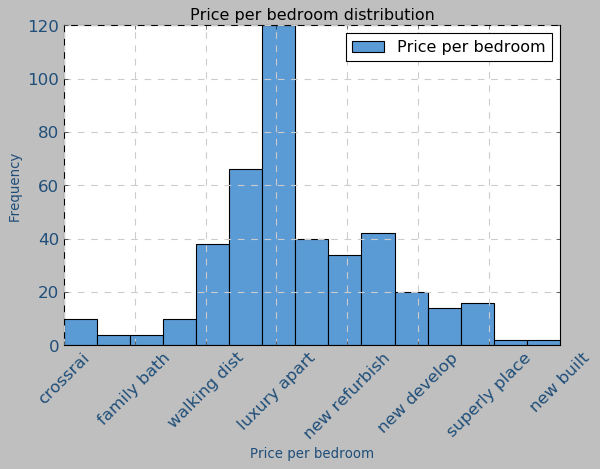

In [108]:
plt.style.use('_classic_test')

my_color = '#5b9bd5'
text_color = '#1f4e79'

ax = df[['Price per bedroom']].plot(kind='hist', title ="Price per bedroom distribution",figsize=(8,5),legend=True, fontsize=10, color = my_color, bins=15)

ax.grid(color = '#cccccc', linestyle = '--', linewidth = 1)

ax.set_xlabel("Price per bedroom",fontsize=12, color = text_color)
ax.set_ylabel("Frequency",fontsize=12, color = text_color)

y_labels = np.arange(0, np.max(df[['Price per bedroom']]), 20)
ax.set_xticklabels(bow[0], rotation=45, fontsize = 15, color = text_color)
ax.set_yticklabels(y_labels, fontsize = 15, color = text_color)

<b># Building-up a Normal Gaussian theorical distribution</b>

Mean(y) = 167500.0
STD(y) = 62066.83225899858


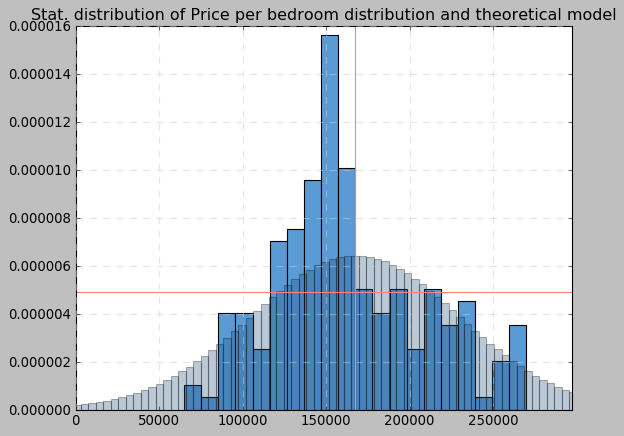

In [109]:
df = df[(df['Price per bedroom'] > 30000)]
df = df[(df['Price per bedroom'] < 280000)]

__d = plt.grid(color = '#cccccc', linestyle = '--', linewidth = 1, alpha = 0.5)

__d = plt.title('Stat. distribution of Price per bedroom distribution and theoretical model')

__d = plt.hist(df['Price per bedroom'], color = '#5b9bd5', normed = True, bins = 20)

x_ = __d[0]
y_ = __d[1]

samples = np.random.normal(np.mean(y_), np.std(y_), size = 10000000)
print("Mean(y) = {}".format(np.mean(y_)))
print("STD(y) = {}".format(np.std(y_)))

__d = plt.hist(samples, bins = 150, alpha = 0.3, normed = True, color = '#1f4e79')

__d = plt.axvline(x = np.mean(y_), color = '#ff8080')
__d = plt.axhline(y = np.mean(x_), color = '#ff8080')

plt.xlim(0, max(df['Price per bedroom'])*1.1)
plt.show()

<b># Define ECDF function</b>

In [110]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

In [111]:
df_noZeros = df[(df['Price per bedroom'] != 0)]

# Create sub-groups for 2 and 4 beds properties
df_2b = df[(df['Bedrooms'] == 2)]
df_4b = df[(df['Bedrooms'] == 4)]

x, y = ecdf(df_noZeros['Price per bedroom'])
x_2b, y_2b = ecdf(df_2b['Price per bedroom'])
x_4b, y_4b = ecdf(df_4b['Price per bedroom'])

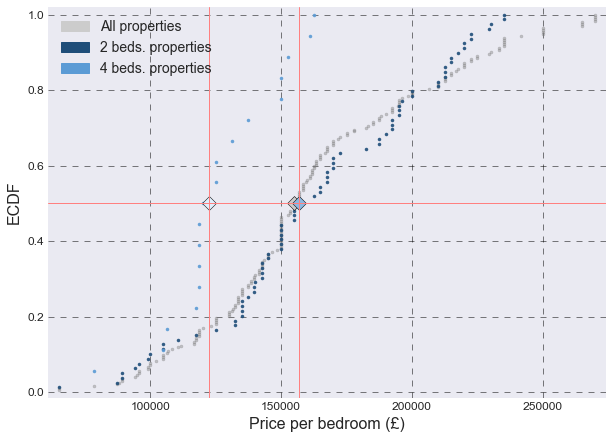

In [112]:
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

# Generate plot
sns.set_style('darkgrid')

# Set plot size
_ = plt.rcParams['figure.figsize'] = (10,7)

_ = plt.plot(x, y, marker='.', linestyle='none', color = '#808080', alpha = 0.4)
_ = plt.plot(x_2b, y_2b, marker='.', linestyle='none', color = '#1f4e79', alpha = 0.9)
_ = plt.plot(x_4b, y_4b, marker='.', linestyle='none', color = '#5b9bd5', alpha = 0.9)

# Make the margins nice
_ = plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Price per bedroom (£)', fontsize = 16, family='Arial')
_ = plt.ylabel('ECDF', fontsize = 16)

# Overlay percentiles as red diamonds.
percentiles = np.array([50])
df_perc = np.percentile(df['Price per bedroom'], percentiles)
df_perc_2b = np.percentile(df_2b['Price per bedroom'], percentiles)
df_perc_4b = np.percentile(df_4b['Price per bedroom'], percentiles)

_ = plt.plot(df_perc, percentiles/100, marker='D', color='#cccccc', linestyle='none', markersize = 10)
_ = plt.plot(df_perc_2b, percentiles/100, marker='D', color='#8db9e2', linestyle='none', markersize = 10)
_ = plt.plot(df_perc_4b, percentiles/100, marker='D', color='#dfeffd', linestyle='none', markersize = 10)


# Draw vertical line on a plot
_ = plt.axvline(x = df_perc_2b, color = '#ff8080')
_ = plt.axvline(x = df_perc_4b, color = '#ff8080')

# Draw a horizontal line on a plot
_ = plt.axhline(y = 0.5, color = '#ff8080')

plt.tick_params(labelsize=12)

# Set axis style
_ = plt.grid(b=True, which='major', color='#000000', linestyle='--')

# Add legend
patch_01 = mpatches.Patch(color='#cccccc', label='All properties')
patch_02 = mpatches.Patch(color='#1f4e79', label='2 beds. properties')
patch_03 = mpatches.Patch(color='#5b9bd5', label='4 beds. properties')
_ = plt.legend(handles=[patch_01, patch_02, patch_03], loc = 'upper left', fontsize = 14)

# Display the plot
plt.show()

In [113]:
print('The median of total price per bedroom is {} £.'.format(df_perc[0]))
print('The median of 2 bed. properties price per bedroom is {} £.'.format(df_perc_2b[0]))
print('The median of 4 bed. properties price per bedroom is {} £.'.format(df_perc_4b[0]))

The median of total price per bedroom is 155000.0 £.
The median of 2 bed. properties price per bedroom is 156975.0 £.
The median of 4 bed. properties price per bedroom is 122493.5 £.


<h3># Checking structure of datasets after calculations</h3>

In [114]:
df.columns

Index(['ID', 'Area', 'Address', 'Bedrooms', 'Bathrooms', 'Price per bedroom',
       'Reception', 'Size', 'First Listed', 'Original price', 'Current price',
       'URL', 'FLOORPLAN LINK', 'New', 'Number of the closest stations',
       'Min. dist. to station', 'Evaluation', 'Description'],
      dtype='object')

In [115]:
df.head(5)

,ID,Area,Address,Bedrooms,Bathrooms,Price per bedroom,Reception,Size,First Listed,Original price,Current price,URL,FLOORPLAN LINK,New,Number of the closest stations,Min. dist. to station,Evaluation,Description
56,47766507,West Drayton,"Kiln Lodge, Yiewsley, Middlesex UB7",2.0,2.0,164975,1.0,0.0,5th May 2018,329950,329950,https://www.zoopla.co.uk/for-sale/details/4776...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.4,1.40,A second floor luxury ...
29,47950352,West Drayton,"Stainby Close, West Drayton UB7",4.0,2.0,150000,3.0,0.0,1th Jun 2018,600000,600000,https://www.zoopla.co.uk/for-sale/details/4795...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.7,1.25,Planning permission gr...
71,47678712,West Drayton,"Colham Avenue, West Drayton, Middlesex UB7",3.0,1.0,125000,2.0,0.0,8th May 2018,375000,375000,https://www.zoopla.co.uk/for-sale/details/4767...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.2,1.25,No chain this three be...
202,45117263,West Drayton,"Money Lane, West Drayton UB7",4.0,2.0,125000,2.0,0.0,8th Sep 2017,500000,500000,https://www.zoopla.co.uk/for-sale/details/4511...,https://c.zoocdn.com/dynimgs/listings/resized/...,NaN,2,0.6,1.25,An exciting and rare o...
92,47522946,West Drayton,"Philpots Close, West Drayton UB7",1.0,1.0,270000,1.0,0.0,5th May 2018,270000,270000,https://www.zoopla.co.uk/for-sale/details/4752...,NaN,NaN,2,0.5,1.25,This well presented on...


<h2># SQL tests on Python dataframes (Pandas)</h2>

In [116]:
sql_test = df[(df['Bedrooms'] == 2) & ((df['Evaluation'] > 1))]

In [117]:
TrainingSet = df[(df['Bedrooms'] == 2) | (df['Bedrooms'] == 3) | (df['Bedrooms'] == 4)]

<p>The training set is defined above as <code>training_set</code></p>

<p><u>Test set</u> is below</p>

In [118]:
TrainingSet.to_csv('TestSet_20180628_WD_SALES.csv')

In [119]:
df[df['Size'] > 0].describe()

,ID,Bedrooms,Bathrooms,Price per bedroom,Reception,Size,Number of the closest stations,Min. dist. to station,Evaluation
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,4.742474e+07,2.428571,1.714286,199330.714286,0.857143,902.571429,2.0,0.371429,0.607143
std,6.823098e+05,0.534522,0.487950,39201.521649,0.899735,212.710176,0.0,0.249762,0.304725
min,4.610930e+07,2.000000,1.000000,139500.000000,0.000000,657.000000,2.0,0.100000,0.400000
25%,4.718968e+07,2.000000,1.500000,178324.500000,0.000000,753.000000,2.0,0.300000,0.400000
50%,4.782884e+07,2.000000,2.000000,212500.000000,1.000000,813.000000,2.0,0.300000,0.550000
75%,4.782896e+07,3.000000,2.000000,222500.000000,1.500000,1061.000000,2.0,0.350000,0.625000
max,4.799772e+07,3.000000,2.000000,241666.000000,2.000000,1220.000000,2.0,0.900000,1.250000


In [120]:
len(df[df['Size'] > 0])

7

In [121]:
len(TrainingSet)

162

<h3># Plot scatter-plot (matplotlib)</h3>

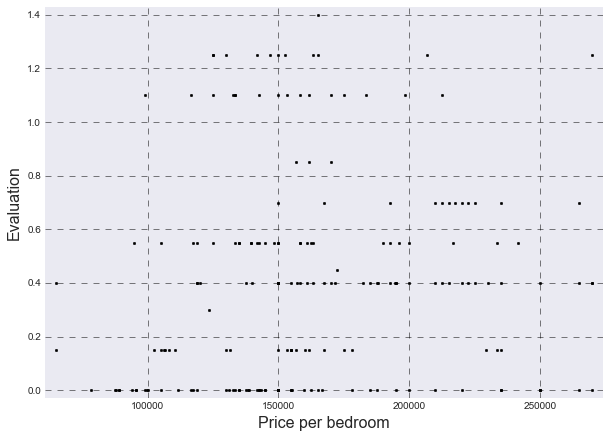

In [122]:
# Generate plot
sns.set_style('darkgrid')

_ = plt.plot(df['Price per bedroom'], df['Evaluation'], marker = '.', linestyle = 'none', markersize = 5, color='#000000')
_ = plt.margins(0.02)

_ = plt.xlabel('Price per bedroom', fontsize = 16, family = 'Arial')
_ = plt.ylabel('Evaluation', fontsize = 16)

# Set axis style
_ = plt.grid(b=True, which='major', color='#000000', linestyle='--')